# Study the condition for the Hohnenberg-Kohn Mapping in a 1nn (2nn) Transverse Ising model

## Case a) 1nn Transverse Ising Model

The Hamiltonian is 

$H=J\sum_i x_i x_{i+1} + \sum_i h_i z_i   \; \; \text{with}  \; \; J<0 \; \; \text{and}  \; \; h_i \in [0,h_{max}]$

We have to check if the $\det{M_{ij}}\ne 0$ with $M_{ij}=\langle z_i z_j \rangle - \langle z_i \rangle \langle z_j \rangle$ for each realization of the Disorder

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils_sparse_diag import transverse_ising_sparse_h_k_mapping_check

#### Data

In [12]:
h_max=np.linspace(0,2*np.e,10)
ndata=1000
l=8
j=-1

zs={}
zzs={}
for h in h_max:
    hs=np.random.uniform(0.,h,(ndata,l))
    z,zz=transverse_ising_sparse_h_k_mapping_check(h_max=h,hs=hs,n_dataset=ndata,l=l,j1=j,j2=j,pbc=True,z_2=False,file_name='none',check_2nn=False,eps_breaking=0.)
    print(zz.shape)
    zs[h]=z
    zzs[h]=zz

  0%|          | 0/1000 [00:00<?, ?it/s]

(1000, 8, 8)


  0%|          | 0/1000 [00:00<?, ?it/s]

#### Analysis of the eigenvalues of $M_{ij}$

In [10]:
m=[]
min_eigh=[]
av_eigh=[]
pb_low=[]
for h in h_max:
    mij=zzs[h]-zs[h][:,None,:]*zs[h][:,:,None]
    lambd,_=np.linalg.eig(mij)
    av_eigh.append(np.average(np.min(lambd,axis=-1)))
    lambd=np.min(lambd,axis=-1)
    pr=lambd[lambd<0.01].shape[0]
    print(pr)
    pb_low.append(pr/ndata)
    m.append(mij)
    min_eigh.append(np.min(lambd))

0
0
0
30
305


#### Plot

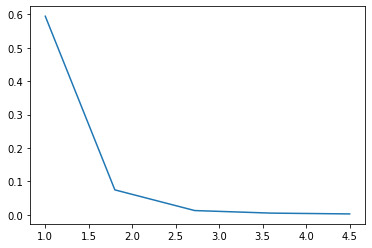

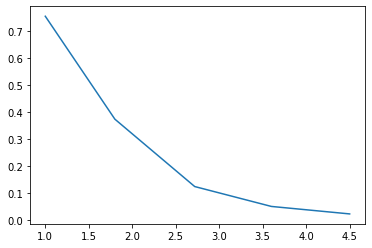

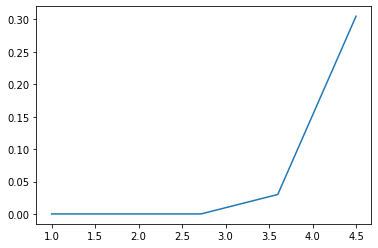

In [11]:
plt.plot(h_max,min_eigh)
plt.show()

plt.plot(h_max,av_eigh)
plt.show()

plt.plot(h_max,pb_low)
plt.show()